<a href="https://colab.research.google.com/github/surendra814/dsml_sept/blob/main/Aerofit_treadmill_Business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/aerofit_treadmill.csv")

##About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


##Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


###***Q1.Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.shape

(180, 9)

In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


***Observations***
*   identified that there are noo null values in the data set



##Q2. Detect Outliers
>○ Find the outliers for every continuous variable in the dataset

>○ Remove/clip the data between the 5 percentile and 95 percentile

In [ ]:
df.describe(include= 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


***Observations***

>*There are no missing values in the data.

>*There are 3 unique products in the dataset.

>*KP281 is the most frequent product.

>*Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.

>*Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.

>*Out of 180 data points, 104's gender is Male and rest are the female.

>*Standard deviation for Income & Miles is very high. These variables might have the outliers in it.




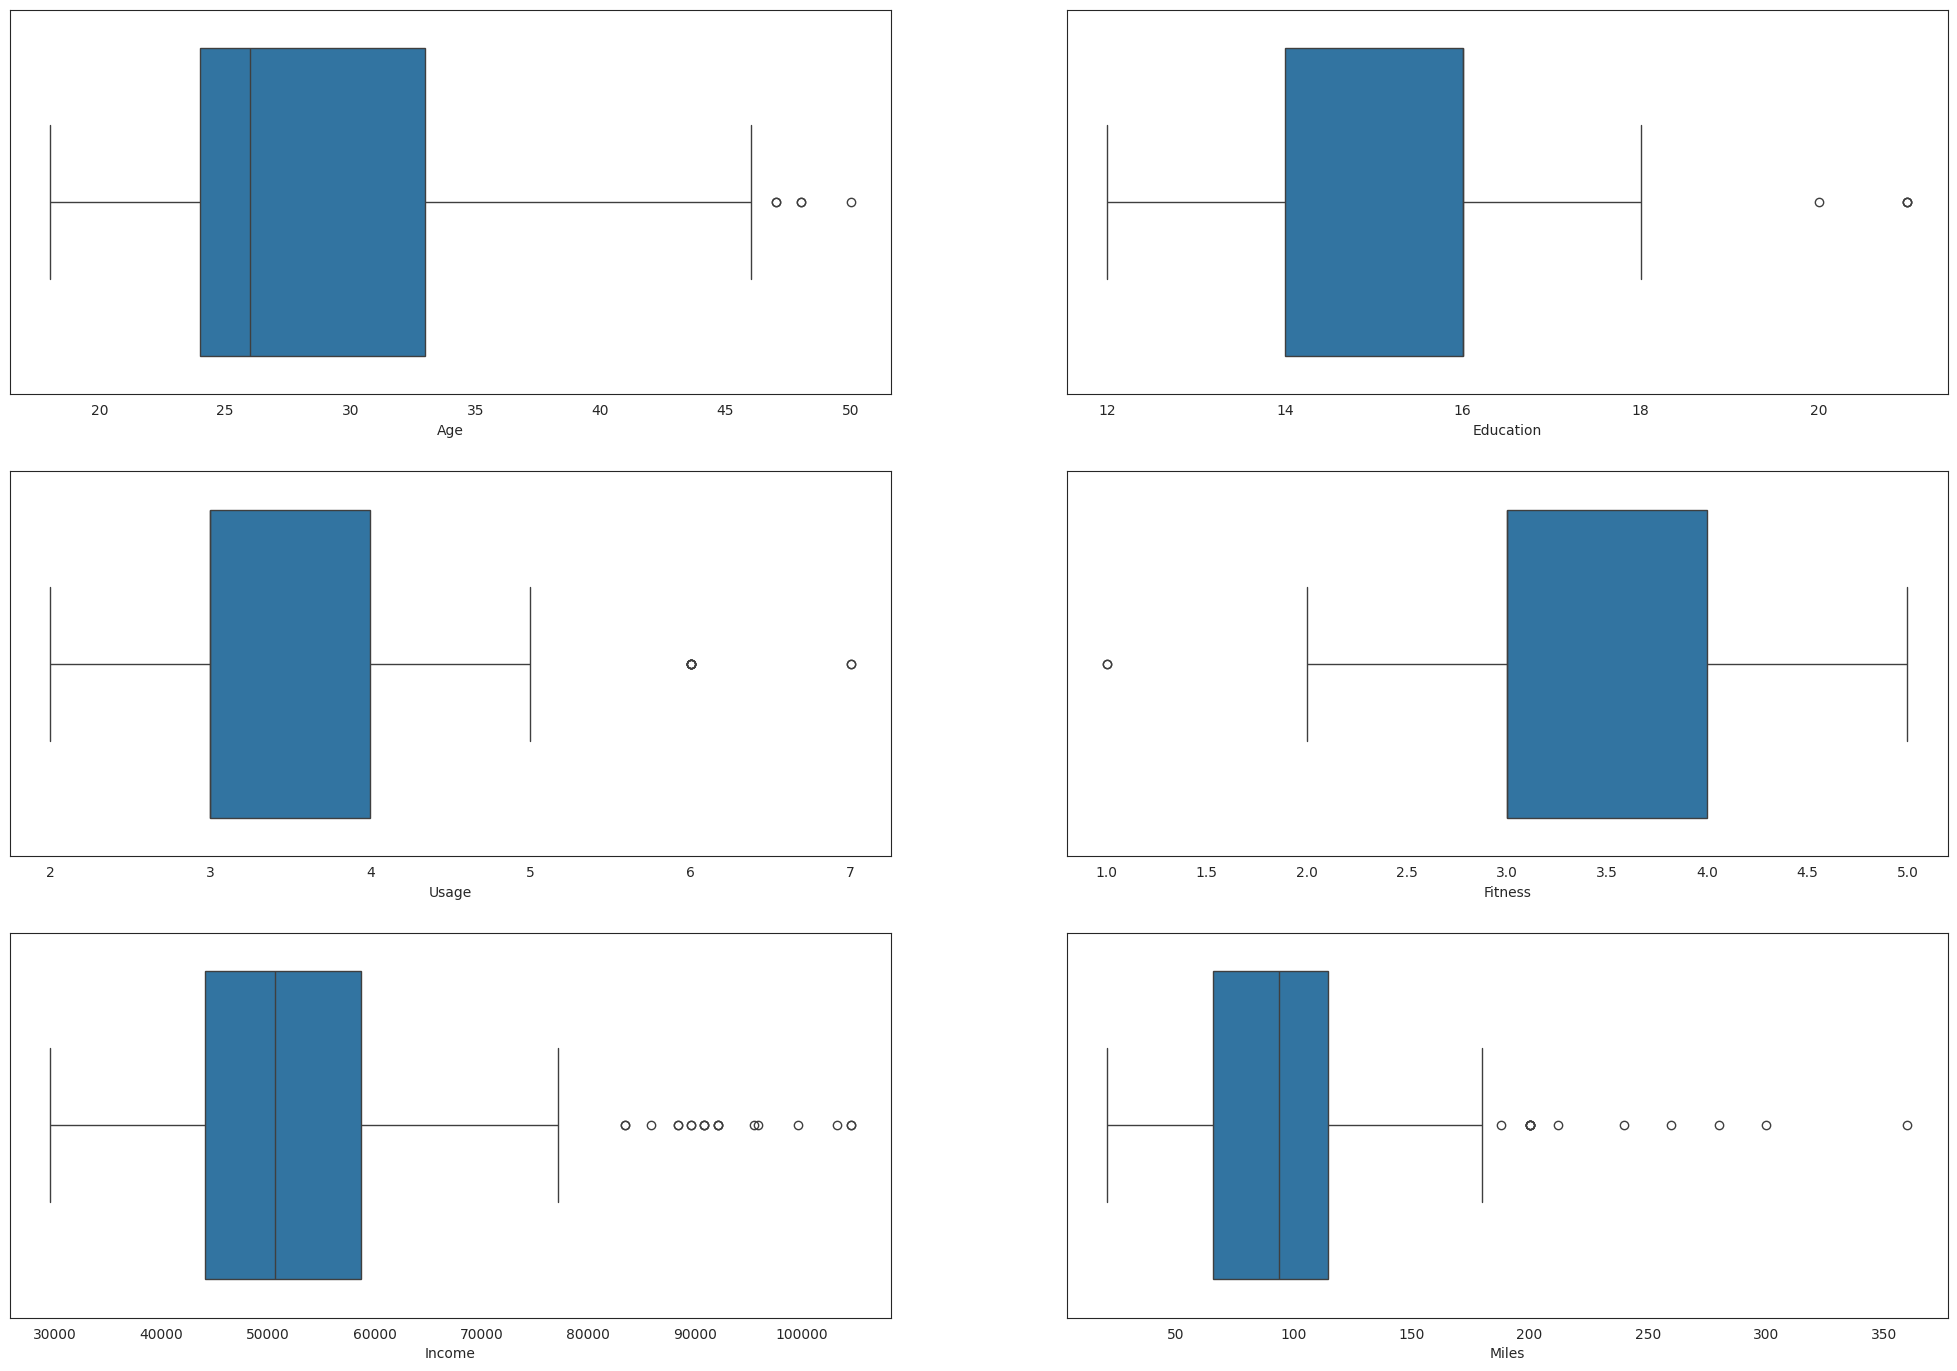

In [ ]:
fig, axis = plt.subplots(nrows = 3, ncols = 2 , figsize = (25,12))
fig.subplots_adjust(top=1.2)
sns.boxplot(data = df, x = 'Age', orient = 'h', ax= axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

***Observations***


*  Age, Education and Usage are having very few outliers.
*  While Income and Miles are having more outliers.



In [ ]:
p_05 = df[['Age','Education','Usage','Fitness','Income','Miles']].quantile(0.05)
p_95 = df[['Age','Education','Usage','Fitness','Income','Miles']].quantile(0.95)

In [ ]:
p_05

Age             20.00
Education       14.00
Usage            2.00
Fitness          2.00
Income       34053.15
Miles           47.00
Name: 0.05, dtype: float64

In [ ]:
p_95

Age             43.05
Education       18.00
Usage            5.05
Fitness          5.00
Income       90948.25
Miles          200.00
Name: 0.95, dtype: float64

In [ ]:
df_clip = df[['Age','Education','Usage','Fitness','Income','Miles']].clip(p_05,p_95,axis = 1)

In [ ]:
df_clip

,Age,Education,Usage,Fitness,Income,Miles
0,20.00,14,3.00,4,34053.15,112
1,20.00,15,2.00,3,34053.15,75
2,20.00,14,4.00,3,34053.15,66
3,20.00,14,3.00,3,34053.15,85
4,20.00,14,4.00,2,35247.00,47
...,...,...,...,...,...,...
175,40.00,18,5.05,5,83416.00,200
176,42.00,18,5.00,4,89641.00,200
177,43.05,16,5.00,5,90886.00,160
178,43.05,18,4.00,5,90948.25,120


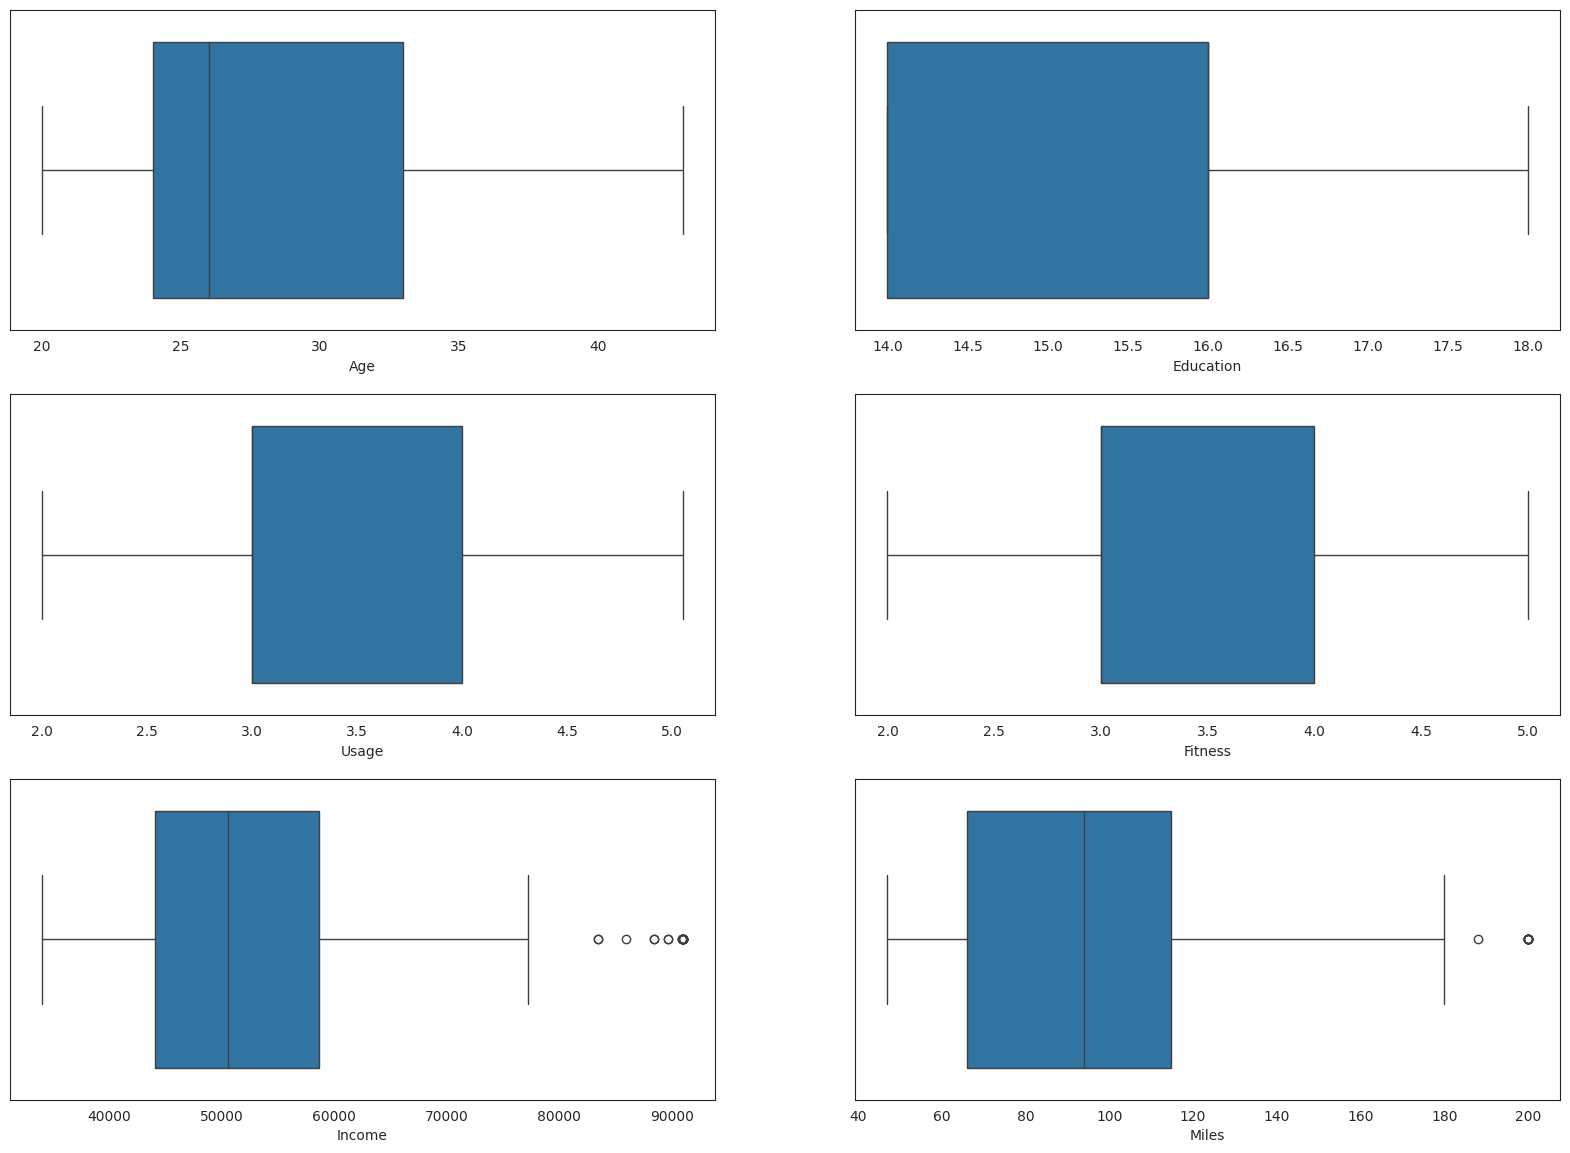

In [ ]:
fig, axis = plt.subplots(nrows = 3, ncols = 2 , figsize = (20,10))
fig.subplots_adjust(top=1.2)
sns.boxplot(data = df_clip, x = 'Age', orient = 'h', ax= axis[0,0])
sns.boxplot(data=df_clip, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df_clip, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df_clip, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df_clip, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df_clip, x="Miles", orient='h', ax=axis[2,1])
plt.show()

***Observations***


*  Clipped the data of Age,Education, Usage, Fitness, Income and miles betweeen 5 percentile to 95 percentile.



###***Q3. Check if features like marital status, Gender, and age have any effect on the product purchased***
>○ Find if there is any relationship between the categorical variables and the output variable in the data.

>○ Find if there is any relationship between the continuous variables and the output variable in the data.

In [ ]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
for col in df.columns:
    print()
    print('Total Unique Values in',col,'column are :-',df[col].nunique())
    print('Unique Values in',col,'column are :-\n',df[col].unique())
    print()
    print('-'*100)


Total Unique Values in Product column are :- 3
Unique Values in Product column are :-
 ['KP281' 'KP481' 'KP781']

----------------------------------------------------------------------------------------------------

Total Unique Values in Age column are :- 32
Unique Values in Age column are :-
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

----------------------------------------------------------------------------------------------------

Total Unique Values in Gender column are :- 2
Unique Values in Gender column are :-
 ['Male' 'Female']

----------------------------------------------------------------------------------------------------

Total Unique Values in Education column are :- 8
Unique Values in Education column are :-
 [14 15 12 13 16 18 20 21]

----------------------------------------------------------------------------------------------------

Total Unique Values in MaritalStatus column are :- 2
Unique Values in Marit

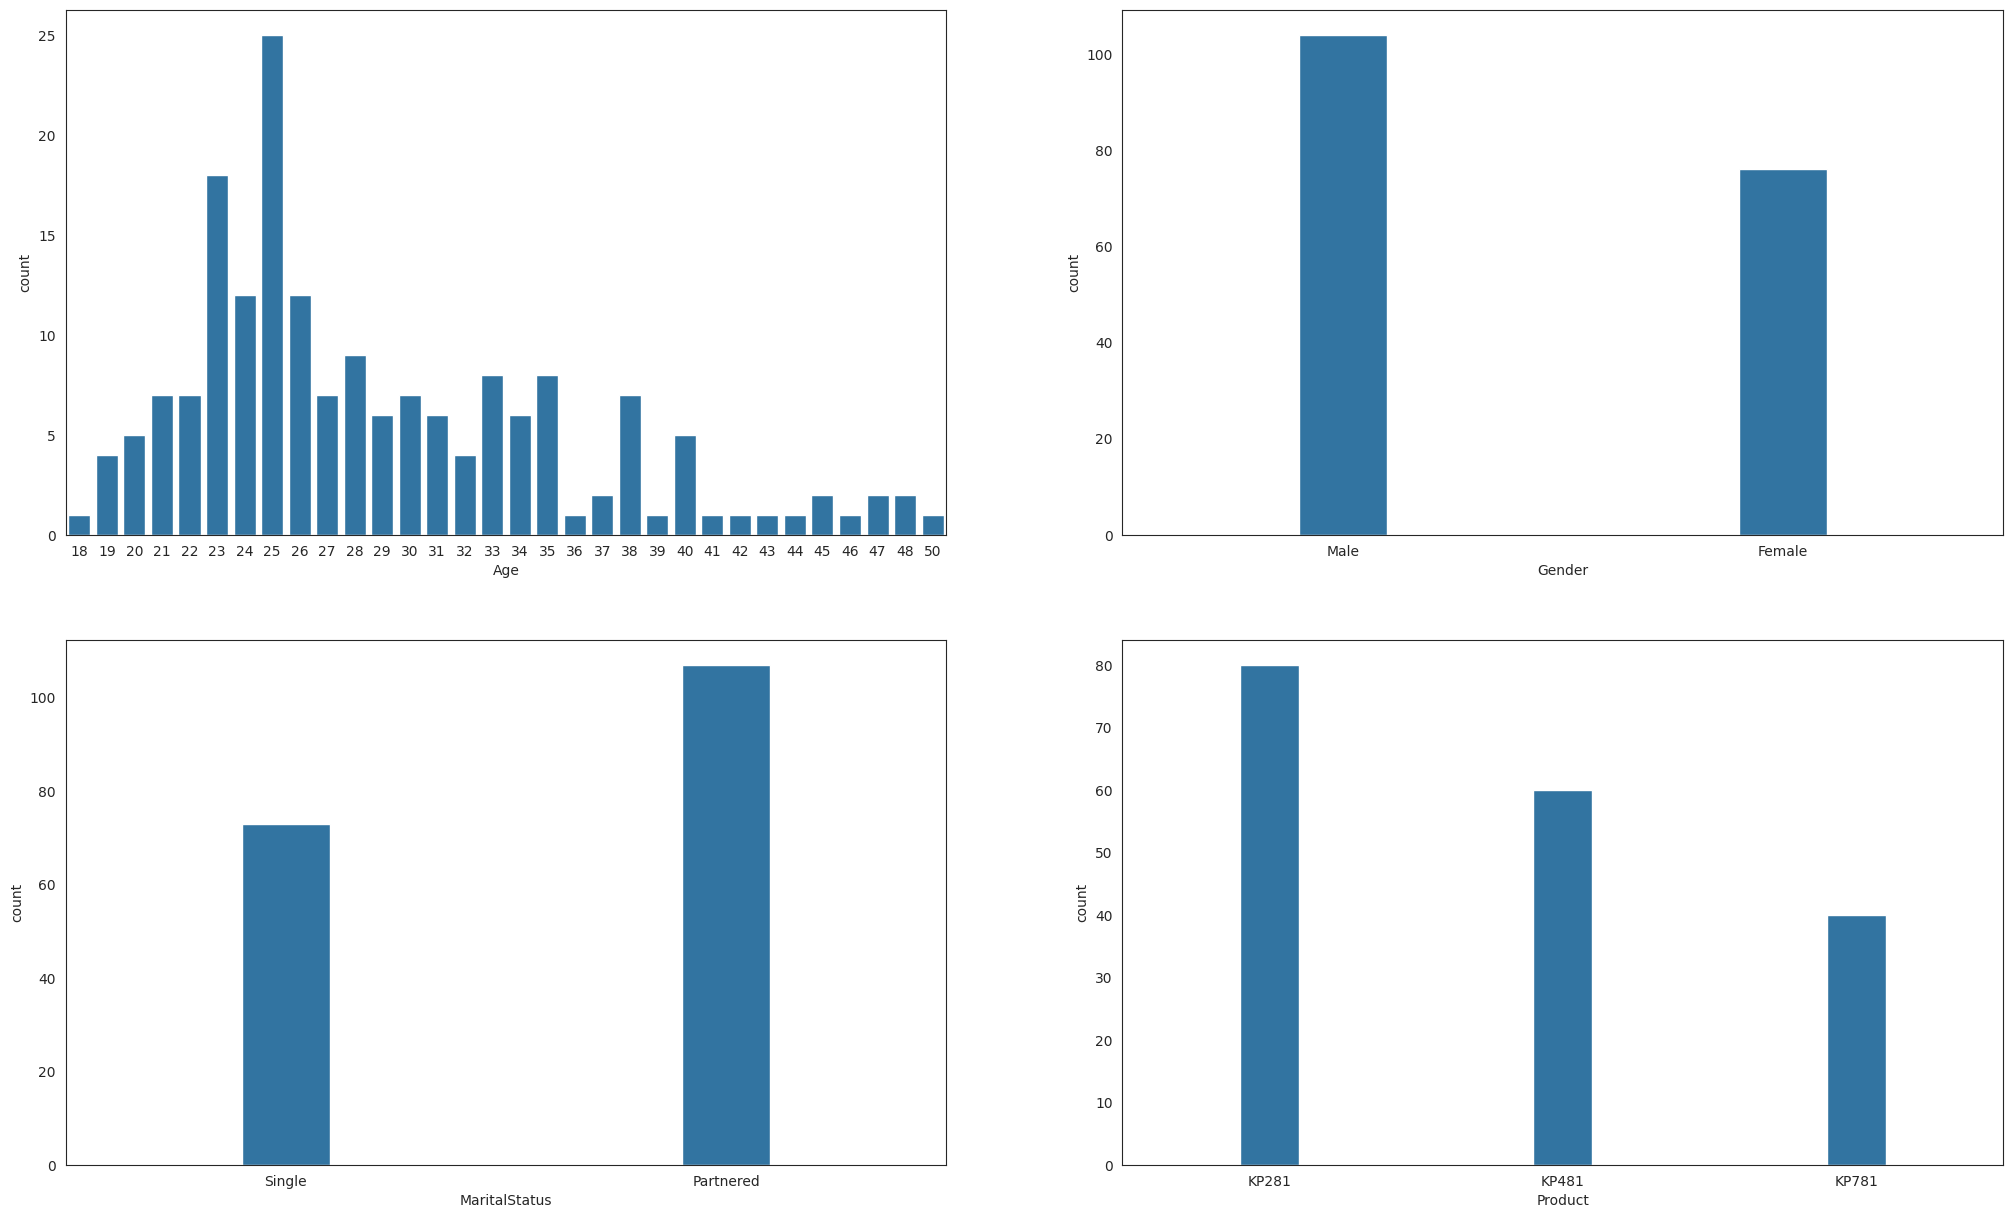

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,12))
sns.countplot(data=df, x='Age', ax=axs[0,0])
sns.countplot(data=df, x='Gender',width = 0.2, ax=axs[0,1])
sns.countplot(data=df, x='MaritalStatus',width = 0.2, ax=axs[1,0])
sns.countplot(data=df, x='Product',width = 0.2, ax=axs[1,1])


plt.show()

***Obervations***

KP281 is the most frequent product.

There are more Males in the data than Females.

More Partnered persons are there in the data.

There are 23 to 26 age group are more in the data.

In [ ]:
cols = ['Product','Gender','Education','MaritalStatus','Usage','Fitness']

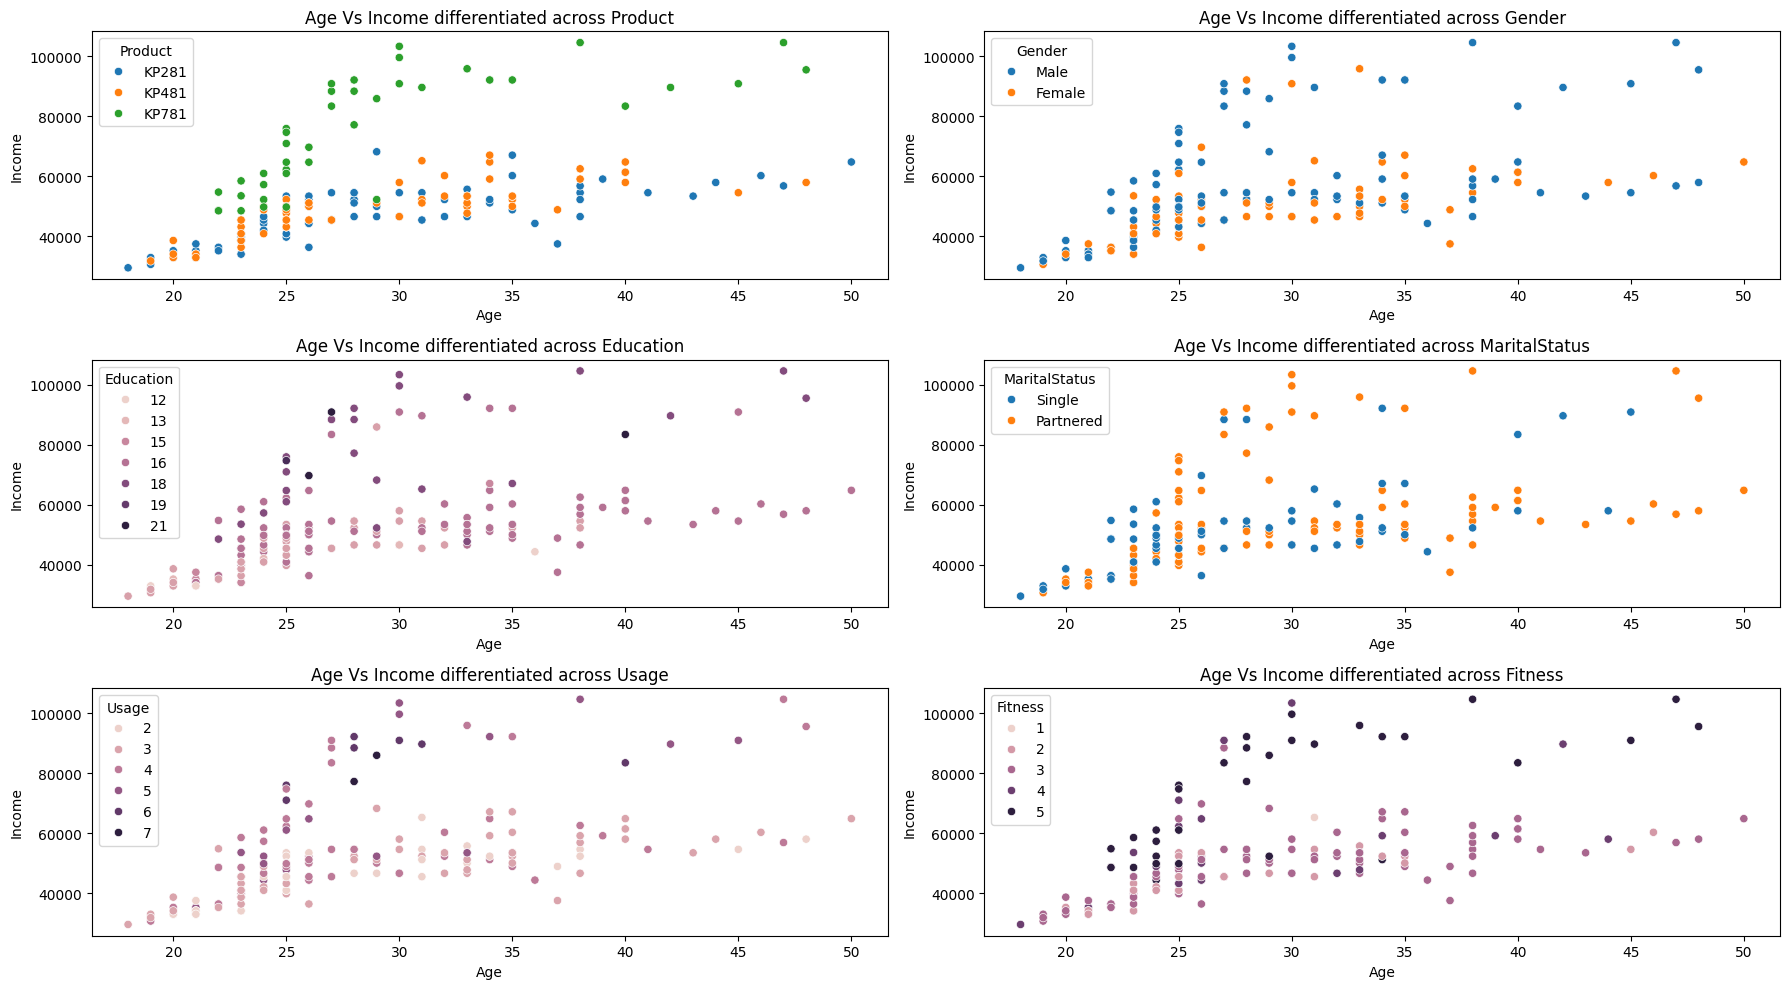

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(25,12))
axes = axes.flatten()
i = 0
for col in cols:
    sns.scatterplot(data=df,x='Age',y='Income',hue=col,ax=axes[i])
    axes[i].set_title(f"Age Vs Income differentiated across {col}")
    i += 1
fig.tight_layout()
plt.show()

***Observations***

>Income is increasing as the age increasing. But there are some exceptional people who got higher salary in there early age only.

>As per given product protfolio information KP781 is costliest treadmill --> that's why only people with highest income borrowing it.

>Males tends to get more higher salary than Females

###***Q4. Representing the Probability***
○ Find the marginal probability (what percent of customers have purchased
KP281, KP481, or KP781)

○ Find the probability that the customer buys a product based on each column.

○ Find the conditional probability that an event occurs given that another event has occurred. (Example: given that a customer is female, what is the probability she’ll purchase a KP481)


In [ ]:
prod_purch=df.Product.value_counts(normalize=True).to_frame()

In [ ]:
prod_purch=prod_purch.reset_index()

In [ ]:
prod_purch['proportion'] = round(prod_purch.proportion*100,2)

In [ ]:
prod_purch

,Product,proportion
0,KP281,44.44
1,KP481,33.33
2,KP781,22.22


In [ ]:
import plotly.express as px
px.pie(prod_purch,values ='proportion',names = 'Product',color = 'Product',title= 'Product Purchase',hole = 0.2)

***Observations***
>Product KP281 borrowed by 45% people followed by KP481 and KP781

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
custbuy_age = round(pd.crosstab(df['Age'],df['Product'],margins = True,normalize = True),3)

In [ ]:
custbuy_age

Product,KP281,KP481,KP781,All
Age,,,,
18,0.006,0.000,0.000,0.006
19,0.017,0.006,0.000,0.022
20,0.011,0.017,0.000,0.028
21,0.022,0.017,0.000,0.039
22,0.022,0.000,0.017,0.039
23,0.044,0.039,0.017,0.100
24,0.028,0.017,0.022,0.067
25,0.039,0.061,0.039,0.139
26,0.039,0.017,0.011,0.067


In [ ]:
custbuy_gender = round(pd.crosstab(df['Gender'],df['Product'],margins = True,normalize = True),3)

In [ ]:
custbuy_gender

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222,0.161,0.039,0.422
Male,0.222,0.172,0.183,0.578
All,0.444,0.333,0.222,1.000


In [ ]:
custbuy_maritalstatus = round(pd.crosstab(df['MaritalStatus'],df['Product'],margins = True,normalize = True),3)

In [ ]:
custbuy_maritalstatus

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.267,0.200,0.128,0.594
Single,0.178,0.133,0.094,0.406
All,0.444,0.333,0.222,1.000


In [ ]:
custbuy_edu = round(pd.crosstab(df['Education'],df['Product'],margins = True,normalize = True),3)

In [ ]:
custbuy_edu

Product,KP281,KP481,KP781,All
Education,,,,
12,0.011,0.006,0.000,0.017
13,0.017,0.011,0.000,0.028
14,0.167,0.128,0.011,0.306
15,0.022,0.006,0.000,0.028
16,0.217,0.172,0.083,0.472
18,0.011,0.011,0.106,0.128
20,0.000,0.000,0.006,0.006
21,0.000,0.000,0.017,0.017
All,0.444,0.333,0.222,1.000


<ipython-input-60-b12a8b77b203>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-60-b12a8b77b203>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-60-b12a8b77b203>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-60-b12a8b77b203>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-60-b12a8b77b203>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

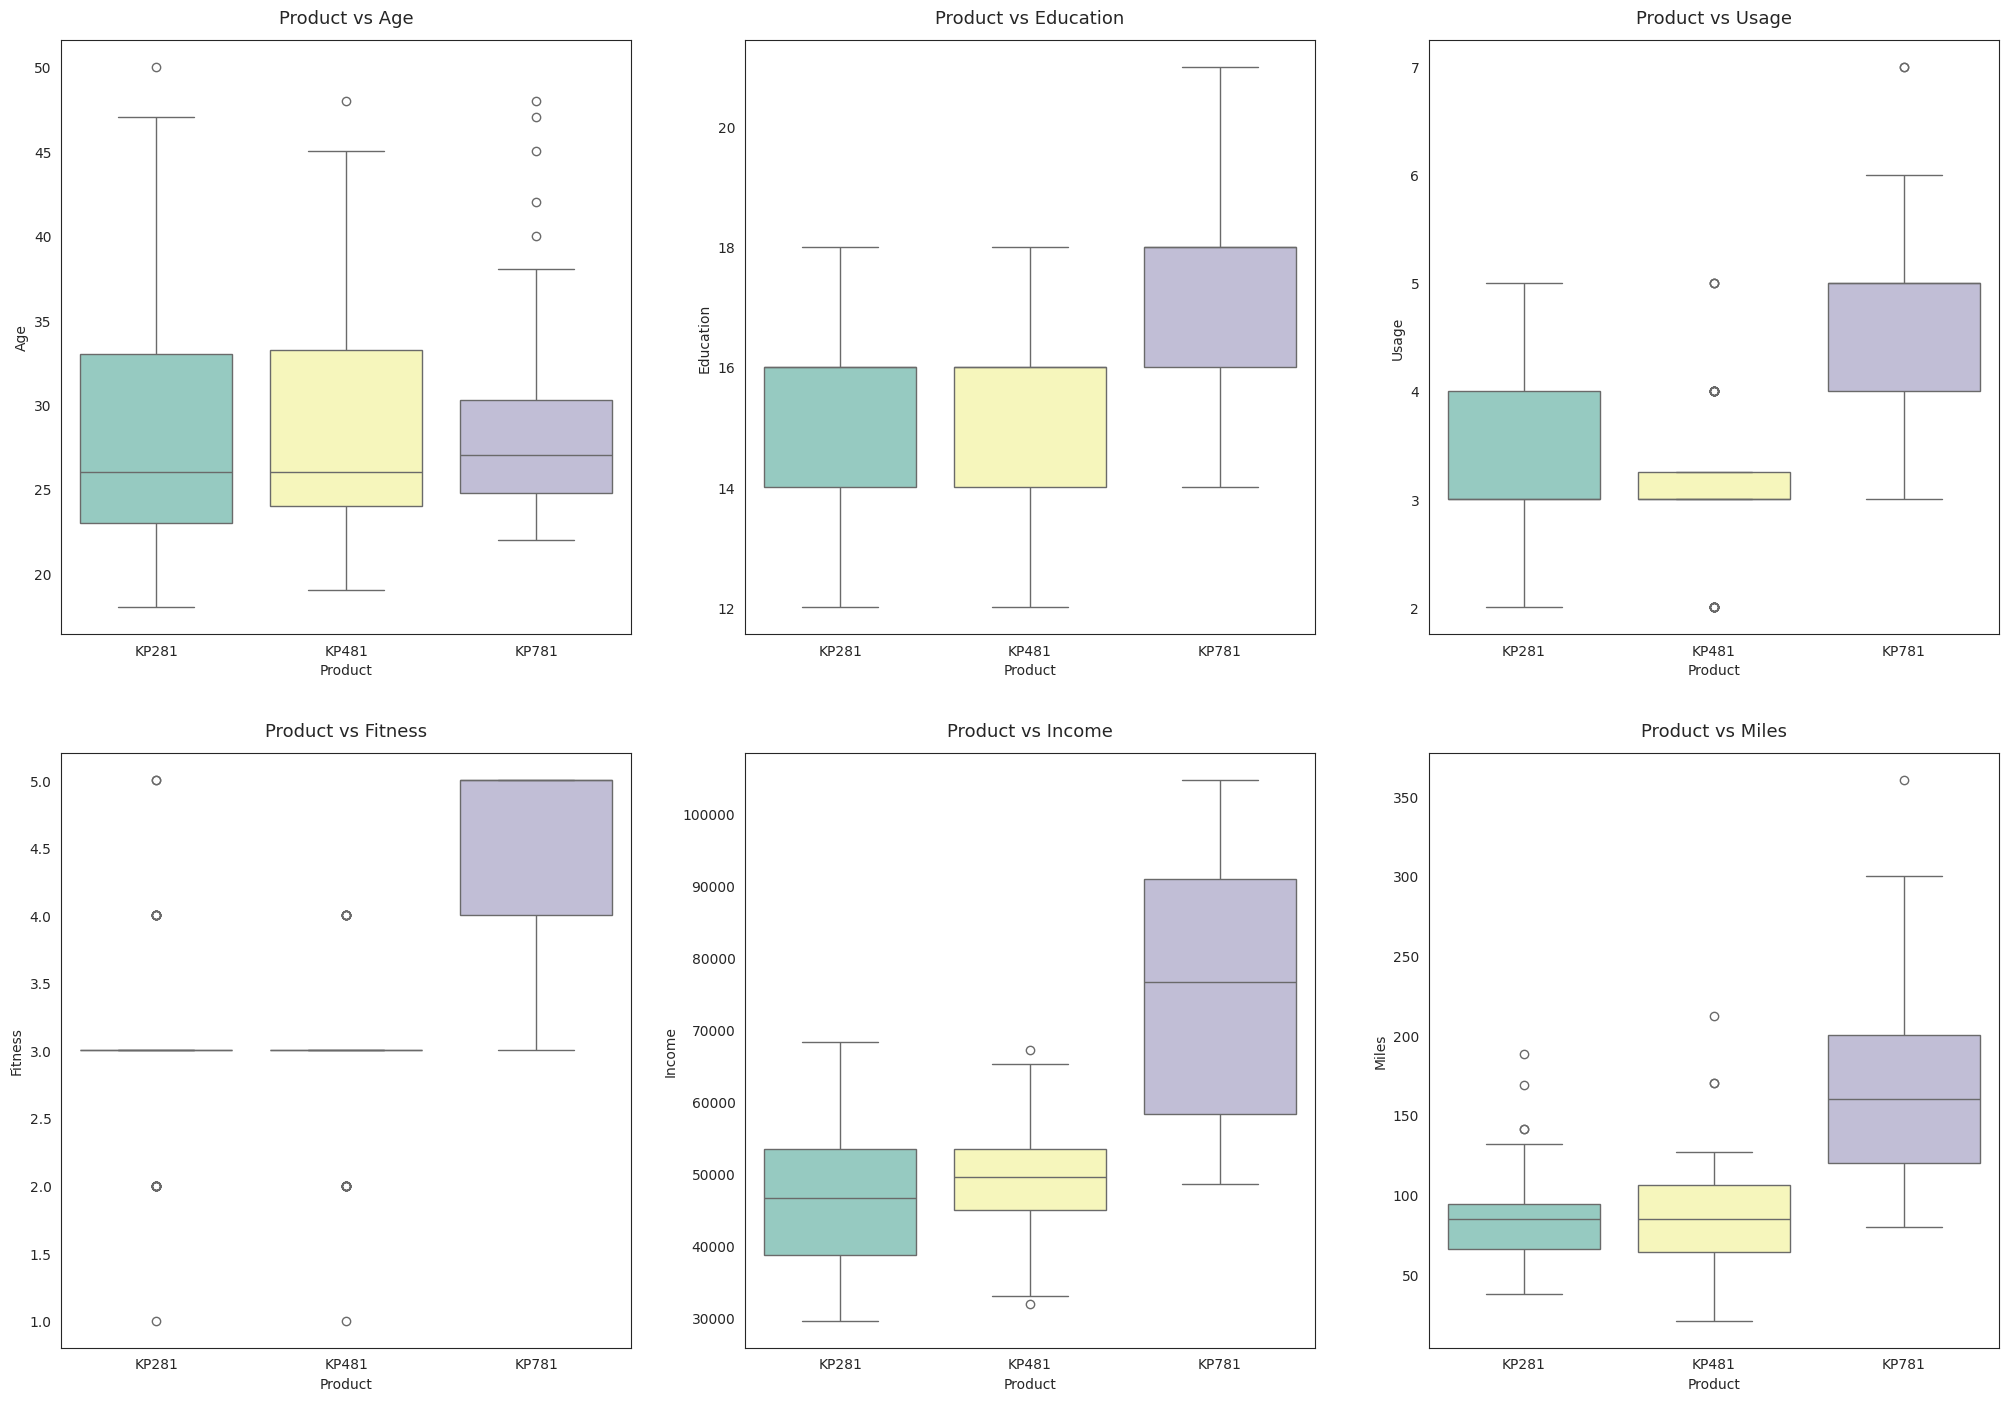

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

***Observations***

***Product vs Age***

>Customers purchasing products KP281 & KP481 are having same Age median value.

>Customers whose age lies between 25-30, are more likely to buy KP781 product

***Product vs Education***

>Customers whose Education is greater than 16, have more chances to purchase the KP781 product.

>While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

***Product vs Usage***
>Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.

>While the other customers are likely to purchasing KP281 or KP481.

***Product vs Fitness***

>The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

***Product vs Income***

>Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

***Product vs Miles***

>If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

***Conditional Probability***

In [ ]:
pms = df[(df['Gender']=='Male') & (df['MaritalStatus']=='Single')]
v1=round(len(pms[pms['Product']=='KP281'])/(len(pms))*100,2)
v2=round(len(pms[pms['Product']=='KP481'])/(len(pms))*100,2)
v3=round(len(pms[pms['Product']=='KP781'])/(len(pms))*100,2)
print('Probability of Male and Single for buying')
print(f'- KP281 is {v1}%\n- KP481 is {v2}%\n- KP781 is {v3}%')

Probability of Male and Single for buying
- KP281 is 44.19%
- KP481 is 23.26%
- KP781 is 32.56%


In [ ]:
pmp = df[(df['Gender']=='Male') & (df['MaritalStatus']=='Partnered')]
v1=round(len(pmp[pmp['Product']=='KP281'])/(len(pmp))*100,2)
v2=round(len(pmp[pmp['Product']=='KP481'])/(len(pmp))*100,2)
v3=round(len(pmp[pmp['Product']=='KP781'])/(len(pmp))*100,2)
print('Probability of Male and Partnered for buying')
print(f'- KP281 is {v1}%\n- KP481 is {v2}%\n- KP781 is {v3}%')

Probability of Male and Partnered for buying
- KP281 is 34.43%
- KP481 is 34.43%
- KP781 is 31.15%


In [ ]:
pfs = df[(df['Gender']=='Female') & (df['MaritalStatus']=='Single')]
v1=round(len(pfs[pfs['Product']=='KP281'])/(len(pfs))*100,2)
v2=round(len(pfs[pfs['Product']=='KP481'])/(len(pfs))*100,2)
v3=round(len(pfs[pfs['Product']=='KP781'])/(len(pfs))*100,2)
print('Probability of Female and Single for buying')
print(f'- KP281 is {v1}%\n- KP481 is {v2}%\n- KP781 is {v3}%')

Probability of Female and Single for buying
- KP281 is 43.33%
- KP481 is 46.67%
- KP781 is 10.0%


In [ ]:
pfp = df[(df['Gender']=='Female') & (df['MaritalStatus']=='Partnered')]
v1=round(len(pfp[pfp['Product']=='KP281'])/(len(pfp))*100,2)
v2=round(len(pfp[pfp['Product']=='KP481'])/(len(pfp))*100,2)
v3=round(len(pfp[pfp['Product']=='KP781'])/(len(pfp))*100,2)
print('Probability of Female and Partnered for buying')
print(f'- KP281 is {v1}%\n- KP481 is {v2}%\n- KP781 is {v3}%')

Probability of Female and Partnered for buying
- KP281 is 58.7%
- KP481 is 32.61%
- KP781 is 8.7%


***Observations***

>Probability of Buying KP281 increased from 44.44% to 58.7%, if the customer is Female and Partnered.

>Probability of Buying KP481 increased from 33.33% to 46.67%, if the customer is Female and Single.

>Probability of Buying KP781 increased from 22.22% to 32.56%, if the customer is Male and Single.

>Probability of Buying KP481 & KP781 increased from 33.33% & 22.22% to 34.43%, if the customer is Male and Single.

>Probability of Buying KP781 decreased from 22.22% to 8.7%, if the customer is Female and Partnered.

###Q5.Check the correlation among different factors
>○ Find the correlation between the given features in the table.


In [ ]:
dfcorr = df[['Age','Education','Usage','Fitness','Income','Miles']].corr()
dfcorr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


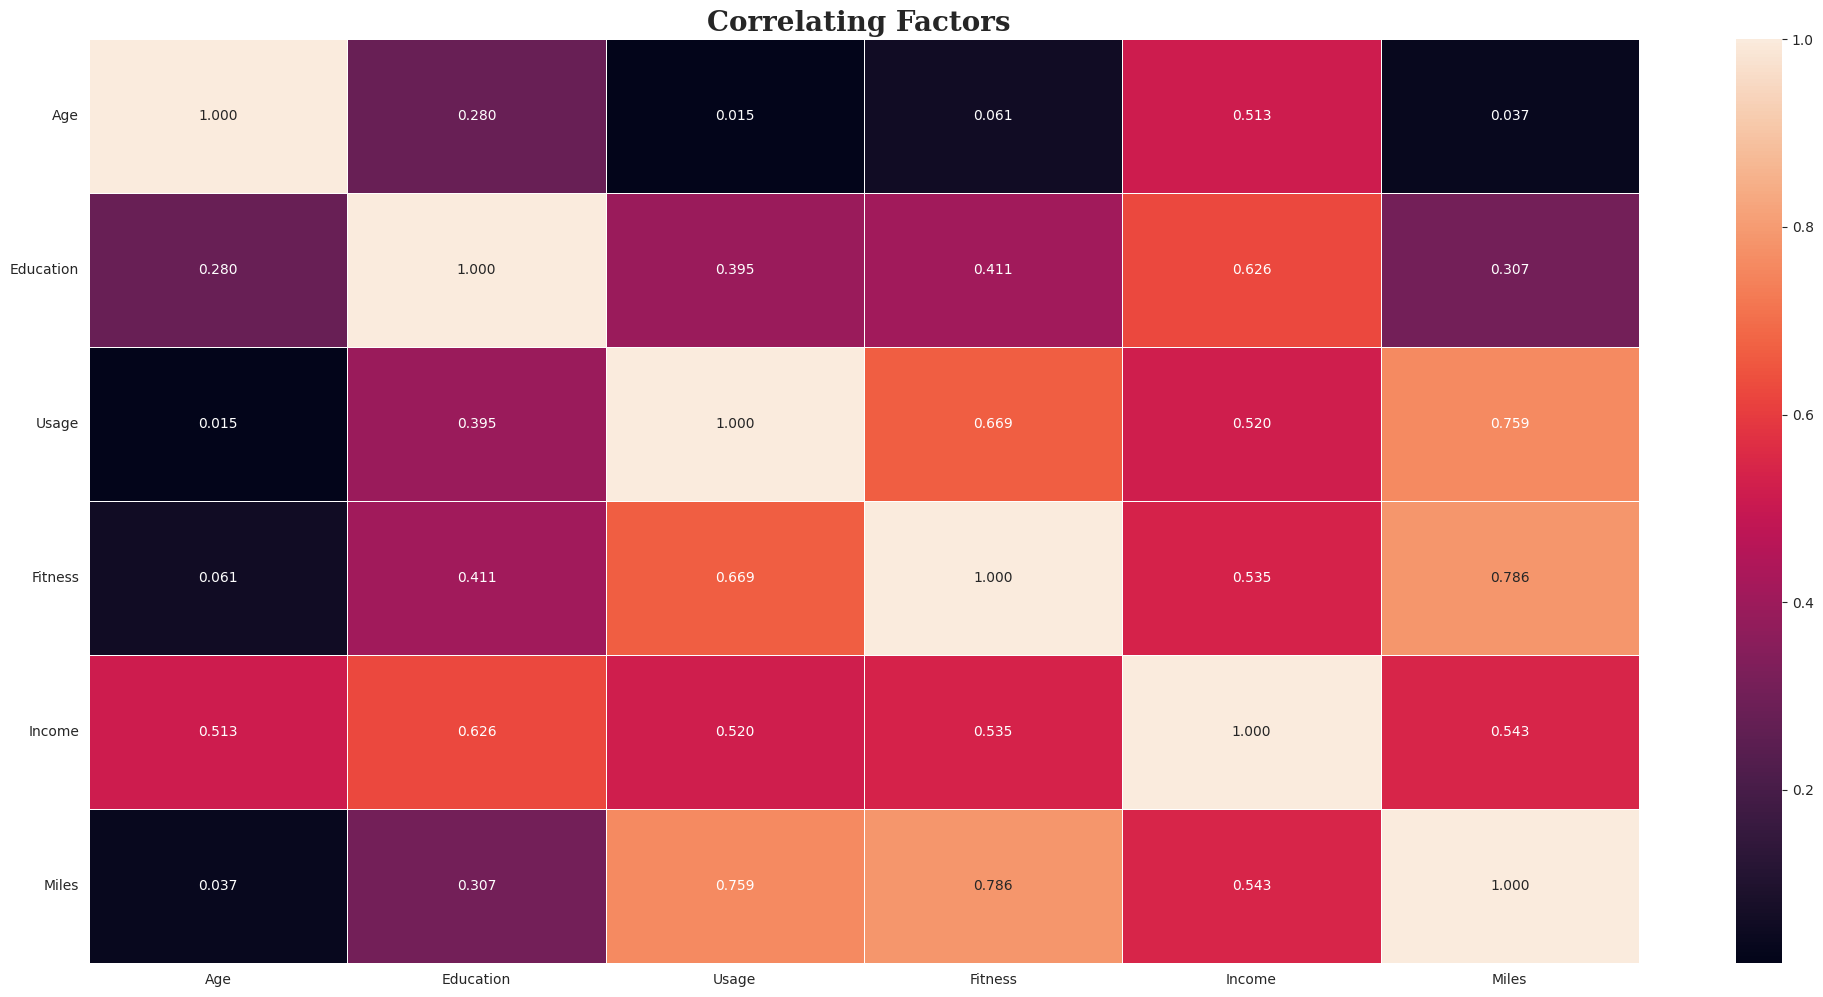

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(25,12))
ax = sns.heatmap(dfcorr,annot=True,fmt='.3f',linewidths=.5)
plt.title('Correlating Factors ',fontfamily='serif',fontweight='bold',fontsize=20)
plt.yticks(rotation=0)
plt.show()

***Observations***

>From the pair plot we can see Age and Income are positively correlated and heatmap also suggests a strong correlation betwwen them

>Eductaion and Income are highly correlated as its obvious. Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.

>Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.



## Q6.CUSTOMER PROFILING :

**Based on all the above analysis**

    -> Probability of purchase of KP281 = 44%
    -> Probability of purchase of KP481 = 33%
    -> Probability of purchase of KP781 = 22%


- `Customer Profile` for **`KP281`** Treadmill:
    
    - Most preferred by entry level
    - Age of customer mainly between 18 to 35 years  with few between 35 to 50 years
    - Education level of customer 13 years and above
    - Annual Income of customer ranges from 35k USD 55k USD
    - Weekly Usage - 3 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 100 miles
    - Mostly Single Female and Partnered Male prefer this product
-----    
    
- `Customer Profile` for **`KP481`** Treadmill:
    
    - This is an Intermediate level Product.
    - Age of customer mainly between 18 to 35 years  with few between 35 to 50 years
    - Education level of customer 13 years and above
    - Annual Income of customer between 40k-80k USD
    - Weekly Usage - 2 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 200 miles
    - Probability of Female customer buying KP481 is significantly higher than male.   
    
    
----

- `Customer Profile` for **`KP781`** Treadmill:

    - Due to the High Price & being the advanced type, customer prefers less of this product.
    - Age of customer between 18 to 35 years
    - Education level of customer 15 years and above
    - Annual Income of customer 80k USD and above
    - Weekly Usage - 4 to 7 times
    - Fitness Scale - 3 to 5
    - Weekly Running Mileage is >100 miles and above
    - Partnered Female bought KP781 treadmill compared to Partnered Male.
    - This product is preferred by the customer where the correlation between Education and Income is High.

##Recommendations :

1. **Gender-Targeted Marketing for KP784:**
   - **Recommendation:** Implement targeted strategies to address the significant sales disparity in KP781 between genders.
   - **Actionable Insight:** Launch exclusive promotions and trials designed specifically for female customers to increase their engagement and contribution to sales.
   
    ----------

2. **Affordable Pricing and Flexible Payment Plans for KP281 and KP481:**
   - **Recommendation:** Make the Prices of KP281 and KP481 more affordably by providing flexible payment plans.
   - **Actionable Insight:** Conduct a pricing analysis considering the target customers' age, education level, and income to determine an optimal and attractive price point.
   
    ----------


3. **User-Friendly App Integration for Enhanced Engagement:**
   - **Recommendation:** Develop a user-friendly app to enhance the overall treadmill experience and keep users engaged.
   - **Actionable Insight:** Include features such as mileage tracking, real-time feedback, and personalized workout recommendations in the app for added value.

    ----------

4. **Strategic Product Promotion:**
   - **Recommendation:** Leverage the characteristics of KP781 customers for targeted promotions.
   - **Actionable Insight:** Analyze the preferences of KP781 customers (males, high income, premium preference) and tailor marketing messages to highlight features that align with these preferences.

    ----------
    
5. **Focus on KP481 with No-Cost EMI Support:**
   - **Recommendation:** Promote KP481 with additional incentives such as no-cost EMI support.
   - **Actionable Insight:** Position KP481 as an attractive option, especially for customers looking for flexible payment options, and communicate the benefits of the no-cost EMI plan.
    
    ----------
    
6. **Targeted Marketing through E-commerce and Social Media:**
   - **Recommendation:** Implement personalized ads on E-commerce and Social Media platforms.
   - **Actionable Insight:** Utilize customer data to create targeted advertisements that resonate with specific characteristics and preferences, maximizing the impact of marketing efforts.
    
    ----------
    
7. **Encouraging Female Fitness:**
   - **Recommendation:** Launch a marketing campaign to encourage women to embrace fitness with Aerofit treadmills.
   - **Actionable Insight:** Create empowering and inclusive marketing messages that highlight the benefits of using Aerofit treadmills for female customers.
   
    ----------
    
8. **Budget Treadmill Image for KP281 & KP481:**
   - **Recommendation:** Position KP281 and KP481 as budget-friendly options.
   - **Actionable Insight:** Use pricing and payment plan flexibility to create a perception of affordability, appealing to customers with varying budgets.
    
    ----------

9. **Professional and Athlete Endorsement for KP781:**
   - **Recommendation:** Market KP781 as a premium product suitable for professionals and athletes.
   - **Actionable Insight:** Collaborate with influencers and international athletes for endorsements to enhance credibility and reach a broader audience.

    ----------
    
10. **Market Expansion and Health Considerations:**
    - **Recommendation:** Conduct research on expanding the market beyond 50 years of age.
    - **Actionable Insight:** Collect data on health considerations and preferences of the older demographic to tailor marketing strategies and product features accordingly.

    ----------
    
11. **Customer Support and Upgrade Recommendations:**
    - **Recommendation:** Provide robust customer support services.
    - **Actionable Insight:** Implement a customer support system that includes guidance on upgrading to higher-level treadmill models after consistent usage, enhancing customer satisfaction and brand loyalty.

    ----------
    
12. **Tailored Recommendations for KP781 to Females:**
    - **Recommendation:** Highlight KP781's advanced features for female customers engaging in extensive exercise routines.
    - **Actionable Insight:** Develop marketing materials that specifically showcase the benefits and user-friendly aspects of KP781 for female users.
    
    ----------
    
13. **Target Age Group Above 40 for KP781:**
    - **Recommendation:** Specifically target and recommend KP781 to the age group above 40 years.
    - **Actionable Insight:** Create targeted advertising campaigns focusing on health benefits and features that align with the preferences of customers aged 40 and above.
    
----------